# Lab 4 Goals

The goals of this lab are:

* To continue practicing with logistic regression models. 
* To calculate model fit statistics. 
* To calculate confusion matrices. 
* To apply LASSO to datasets used for linear and logistic regression. 

For this lab, it may be helpful to install and load the following modules:
    
* `numpy`
* `pandas`
* `plotnine`
* `statsmodels`

In [1]:
import numpy as np
import pandas as pd
import plotnine as p9
import statsmodels.api as sm

We will also use new modules, `random` and `scikit-learn`. Install and load them now. 


In [2]:
import random
import sklearn

For this lab, we will continue using the Toronto Star arrests dataset discussed in lecture. Refresh yourself on the included variables by reading the [dataset documentation](https://vincentarelbundock.github.io/Rdatasets/doc/carData/Arrests.html). Download the dataset from Canvas and load it into your workspace. 

In [3]:
arrests = pd.read_csv("/Users/amynussbaum/Documents/U of C/Courses/119/Week 4/Lab/Arrests.csv")

# Exploratory Data Analysis

1. We've looked at this dataset in class, but you haven't necessarily explored it by yourself. Take some time to look at summary statistics and distributions of each of the variables. Now might also be a good time to identify categorical variables and convert them to indicators.

In [4]:
arrests.describe()

arrests = pd.get_dummies(arrests, columns = ['released', 'race', 'sex', 'employed', 'citizen'])

2. Now that you have familiarized yourself with the data, split the data into a 70\% training set and a 30\% training set using the `sample` function from the `random` module, and the `.drop()` and `.loc` methods. Note that when you randomly split, you will get a different dataset each time--this will lead to consistent, but different, results. If you want to have the same results every time, you can set a random seed first--use the `.seed()` method from the `random` package. 

In [5]:
random.seed(651)

ind = random.sample(range(arrests.shape[0]-1), round(0.7*arrests.shape[0]))

arrests_test = arrests.drop(ind)
arrests_train = arrests.loc[ind]

# Model Fit Statistics

3. Now, using your training set, fit a logistic regression model predicting whether an individual is released with a summons using the `statsmodel` syntax. Use any (or all) of the variables you like.

In [6]:
X_train = arrests_train[['year', 'age', 'checks', 'race_Black', 'sex_Male', 'employed_Yes', 'citizen_Yes']]
X_train = sm.add_constant(X_train)

Y_train = arrests_train['released_Yes']

model1 = sm.Logit(Y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.718510
         Iterations 7


4. Print out the `summary` output. Recall that some of the metrics we use to evaluate logistic regression models are $AIC$ and $BIC$. Can you find those values in the output?


In [7]:
model1.summary()

/Users/amynussbaum/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
/Users/amynussbaum/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
/Users/amynussbaum/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:3511: RuntimeWarning: divide by zero encountered in double_scalars


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           released_Yes   No. Observations:                 3658
Model:                          Logit   Df Residuals:                     3650
Method:                           MLE   Df Model:                            7
Date:                Mon, 17 Apr 2023   Pseudo R-squ.:                     inf
Time:                        12:06:04   Log-Likelihood:                -2628.3
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           28.8342     67.669      0.426      0.670    -103.794     161.463
year            -0.0137      0.034     -0.405      0.685      -0.080       0.053
age              0.0015      0.006      0.267      0.790      -0.009       0.012
checks          -0.3684      0.031    -11.717      0.000      -0.430      -0.307
race_Black      -0.3594      0.103     -3.490      0.000      -0.561      -0.158
sex_Male         0.0275      0.181      0.152      0.879      -0.326       0.381
employed_Yes     0.8207      0.102      8.085      0.000       0.622       1.020
citizen_Yes      0.4953      0.126      3.920      0.000       0.248       0.743
================================================================================
"""

\textcolor{blue}{You can't see them, but you can see likelihood, which is what they are based on. More in the next step!}

5. Last week we saw that sometimes we don't need all of the printed output, and sometimes we would like to find specific values. First, we need to identify what is included in the model fitting process. Apply the `dir()` function to your model to see what is included. Scan the terms--are there any that you recognize?

\textcolor{blue}{You can see } `aic` \textcolor{blue}{and } `bic` \textcolor{blue}{in the model.} 

6. Hopefully you can see that $AIC$ and $BIC$ are included. Pull them out of the model.


In [8]:
model1.aic
model1.bic

5322.253637120323

7. Another common method for evaluating logistic regression models is the confusion matrix. Take another look at the terms that are included in the regression model. Can you find something that looks like it might be the confusion matrix?

\textcolor{blue}{You should be looking for } `pred_table`\textcolor{blue}{.}

8. Hopefully you located `pred_table`. Print it out. Can you identify which cell is the true positives? What about the false positives?

In [9]:
model1.pred_table()


array([[  28.,  586.],
       [  32., 3012.]])

9. Be careful when using `pred_table`! In this method, the rows indicate the truth and the columns indicate the predictions, which is "flipped" (transposed, if you want the more formal mathematical term) from what I presented in class. Read the [`pred_table` documentation](https://www.statsmodels.org/dev/generated/statsmodels.discrete.discrete_model.LogitResults.pred_table.html) to confirm. Then, calculate the accuracy, true positive rate, true negative rate, positive predictive value, and negative predictive value. 

In [10]:
cm1 = model1.pred_table()

## Accuracy
(cm1[0][0] + cm1[1][1])/cm1.sum()

## TPR
cm1[1][1]/(cm1[1][0] + cm1[1][1])
  
## TNR
cm1[0][0]/(cm1[0][0] + cm1[0][1])

## PPV
cm1[1][1]/(cm1[0][1] + cm1[1][1])
  
## NPV
cm1[0][0]/(cm1[0][0] + cm1[1][0])

0.4666666666666667

10. Remember that we might want a baseline accuracy to compare with the new accuracy. What is the baseline accuracy for this dataset?

In [11]:
sum(Y_train == 1)/len(Y_train)


0.8321487151448879

11. Now recall that to avoid model fitting, we want to measure performance on the training set. Use the `.predict()` method to predict the outcome for the test set. Save the list to use for later.

In [12]:
X_test = arrests_test[['year', 'age', 'checks', 'race_Black', 'sex_Male', 'employed_Yes', 'citizen_Yes']]
X_test = sm.add_constant(X_test)

Y_test = arrests_test['released_Yes']

preds1 = model1.predict(X_test)

12. Let's investigate an alternative method for finding the confusion matrix. You can use the `pd.crosstab()` function--the benefit of this function is that you have more control over what is in the rows and what is in the columns. See if you can use it to find the confusion matrix and accuracy metrics using a threshold of 0.5. How do your metrics compare to the metrics of the training set?


In [13]:
pd.crosstab(Y_test, preds1 > 0.5)


col_0,False,True
released_Yes,,
0,18,260
1,14,1276


13. A final method that might be nice to use in reports and such is the .... method from `sklearn`. See the code below for evaluating the confusion matrix on the training set. Can you adapt the code to return the confusion matrix for the test set?

In [14]:
sklearn.metrics.confusion_matrix(Y_train, model1.predict() > 0.5)
sklearn.metrics.confusion_matrix(Y_test, preds1 > 0.5)

array([[  18,  260],
       [  14, 1276]])

14. Another helpful function in `sklearn` is the AUC method. See the code below for evaluating the AUC of the training set. Can you adapt the code to return the AUC of the test set? You can read the [AUC documentation](https://www.w3schools.com/python/python_ml_auc_roc.asp) if you need it.


In [15]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(Y_train, model1.predict(), 
                                         pos_label=1)
metrics.auc(fpr, tpr)

fpr, tpr, thresholds = metrics.roc_curve(Y_test, preds1, 
                                         pos_label=1)
metrics.auc(fpr, tpr)

0.7156419050805867

## LASSO

15. Now let's move onto fitting the LASSO. Before we do anything else, we need to standardize the data. Luckily, `sklearn` has a method for us--`StandardScaler`. We want to apply this method to the training set, while also saving it to use later for the test set. Familiarize yourself with the code below so that you know how to use these functions in the future. In case you need it, you can find [the documentation for `StandardScaler` here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

Note--because we standardize, we do not have to include a constant term! We can re-define `X_train` to exclude that column.

In [20]:
from sklearn.preprocessing import StandardScaler

X_train = arrests_train[['year', 'age', 'checks', 'race_Black', 'sex_Male', 'employed_Yes', 'citizen_Yes']]
X_test = arrests_test[['year', 'age', 'checks', 'race_Black', 'sex_Male', 'employed_Yes', 'citizen_Yes']]

#X_train.columns
#X_test.columns

scaler = StandardScaler()
scaler.fit(X_train)

X_train_pp = pd.DataFrame(scaler.transform(X_train), columns = [['year', 'age', 'checks', 'race_Black', 'sex_Male', 'employed_Yes', 'citizen_Yes']])
X_test_pp = pd.DataFrame(scaler.transform(X_test), columns = [['year', 'age', 'checks', 'race_Black', 'sex_Male', 'employed_Yes', 'citizen_Yes']])

,year,age,checks,race_Black,sex_Male,employed_Yes,citizen_Yes
0,0.361633,-0.220738,-1.065142,-0.579244,0.303217,0.520173,0.423815
1,0.361633,-0.582718,-1.065142,-0.579244,0.303217,0.520173,0.423815
2,1.073609,-0.462058,-1.065142,-0.579244,0.303217,0.520173,0.423815
3,-1.774296,-0.220738,1.525046,1.726387,0.303217,0.520173,-2.359518
4,-0.350344,-0.824039,-1.065142,-0.579244,0.303217,0.520173,0.423815


16. Remember that LASSO is also used for feature selection, so it is common to fit a model with all of the variables for a wide range of threshold parameters. The most straightforward way to do this is to use the `linear_model.LogisticRegression` method from `sklearn`. Read the documentation for this function and fit a model predicting whether an individual is arrested from all of the variables (ignore the threshold parameter for now). 

In [23]:
model2 = sklearn.linear_model.LogisticRegression()
model2.fit(X_train_pp, Y_train)

array([[-0.01906542,  0.01209065, -0.56764726, -0.15580807,  0.00749401,
         0.33566715,  0.17757368]])

17. Once you read the documentation and successfully fit the model, you should find that it is relatively simple to adapt your code to fit a regularized version (a.k.a., the LASSO). Different software programs have different names for the threshold parameter--read [the documentation for logistic regression in `sklearn`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to find out what it is called for `sklearn`. What values can you input? Adapt the code from 16. to turn this into a LASSO (just to test, use `C = 1.0`)

\textcolor{blue}{We are interested in both } `penalty` \textcolor{blue}{and } `C`\textcolor{blue}{, which tell us we can use $\ell_1$ regularization and give the "inverse of regularization strength", respectively.} 

In [24]:
model3 = sklearn.linear_model.LogisticRegression(penalty='l1', solver = 'liblinear', C = 1.0)
model3.fit(X_train_pp, Y_train)

LogisticRegression(penalty='l1', solver='liblinear')

18. Remember that we need to pick the right parameter ($t$ from the lecture notes, `C` in `sklearn`). There are a variety of ways to go about this, but the most straightforward way is to write a loop fitting the model multiple times, saving the following:

* The value of the threshold you used to fit the model,
* The coefficients of the model,
* The AUC (or some other model fit statistic) evaluated on the training set. 

First, create objects to store the coefficients and the AUC (we'll save the thresholds separately). I found it most helpful to use lists and dataframes.

In [26]:
coefs_lasso = pd.DataFrame()
auc_list = []

19. Next, select a range of "budget parameters". In the notes we called this $t$, in `sklearn`, it is called `C`. This will be what you iterate over in your loop and a piece that you will need if you want to graph the coefficients. I mentioned in class that this can take some trial and error--I used the range 0.00001 to 0.2 in increments of 0.001, but in the future you might have to run multiple loops to get something reasonable. 

To actually create the range, you can use `np.arange()` (must be used instead of `range()` for floats). Save it in `Cs`.


In [27]:
Cs = np.arange(0.00001, 0.2, 0.001)

20. Now, use `Cs` to create the loop. You can use the code from 14. and 17. to write the contents of the loops. Code one instance of the loop below (again, I used `C = 1.0` to test the code), making sure you are properly saving the objects. 

In [35]:
coefs_lasso = pd.DataFrame()
auc_list = []
  
model = sklearn.linear_model.LogisticRegression(penalty='l1', solver = 'liblinear', C=0.5)
tempmodel = model.fit(X_train_pp, Y_train)
pd.concat([coefs_lasso, pd.Series(tempmodel.coef_[0]).to_frame().T], ignore_index = True)

#pd.concat([coefs_lasso, pd.Series(tempmodel.coef_[0]).to_frame().T], ignore_index=True)
#pred = tempmodel.predict(X_test_pp)
#fpr, tpr, thresholds = metrics.roc_curve(Y_test, pred, pos_label=1)
#auc_list.append(metrics.auc(fpr, tpr))

,0,1,2,3,4,5,6
0,-0.013281,0.006793,-0.562353,-0.153158,0.001726,0.332888,0.17222


21. Now, combine 18., 19., and 20. to write the full loop and run it. 


In [27]:
coefs_lasso = pd.DataFrame()
auc_list = []

for threshold in Cs:
  model = sklearn.linear_model.LogisticRegression(penalty='l1', solver = 'liblinear', C=threshold)
  tempmodel = model.fit(X_train_pp, Y_train)
  coefs_lasso = pd.concat([coefs_lasso, pd.Series(tempmodel.coef_[0]).to_frame().T], ignore_index=True)
  pred = tempmodel.predict(X_test_pp)
  fpr, tpr, thresholds = metrics.roc_curve(Y_test, pred, pos_label=1)
  auc_list.append(metrics.auc(fpr, tpr))

22. We have learned previously that to create plots with `plotnine` we need to create a dataframe. Create a dataframe with columns for `threshold` and each of the coefficients in the model--you may want to rename the columns for convenience later.

In [28]:
arrests_lasso_plt = coefs_lasso
arrests_lasso_plt.rename(columns={0: 'year', 1: 'age',
                                  2: 'checks', 3: 'race_Black',
                                  4: 'sex_Male', 5: 'employed_Yes',
                                  6: 'citizen_Yes'}, inplace = True)

arrests_lasso_plt['Threshold'] = Cs

# LASSO Plots

23. Now let's work on making the plot comparing the coefficients to the threshold. You have used `geom_histogram()` and `geom_point()` before, but let's introduce a new geom, `geom_line()`. This will plot all values and connect them with a line. Fill in the shell code below to create the plot. 

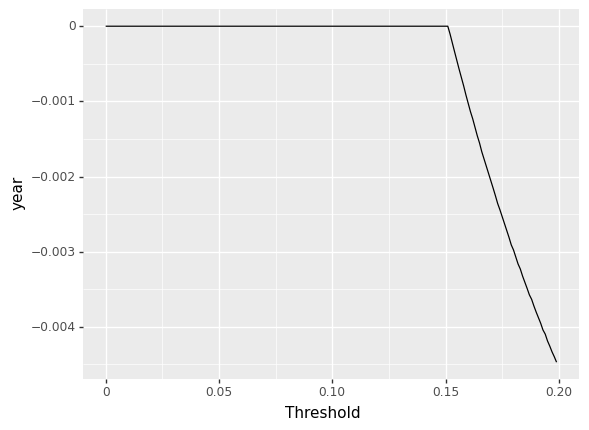

<ggplot: (327362389)>

In [29]:
(p9.ggplot(arrests_lasso_plt, p9.aes(x = 'Threshold', y = 'year')) +
  p9.geom_line())

24. Hopefully, you have identified that you can only specify one `x` value--but we have multiple coefficients we would like to investigate! We need to make a change to the dataframe so that there are two new columns--one with all the coefficient values, and one giving the variables it belongs to. We can use `pd.melt` to do so--familiarize yourself with the code below so that you know how to use these functions in the future. The column with all the coefficient values is now `Coefficient`, and the column with the variables is `Variable`.

In [30]:
arrests_lasso_plt_melt = pd.melt(arrests_lasso_plt, id_vars = 'Threshold', 
                                var_name = 'Variable', value_name = 'Coefficient')

25. Now, adapt your `plotnine` code to get multiple lines on the graph using `x = 'Threshold'` and `y = 'Coefficient'`.

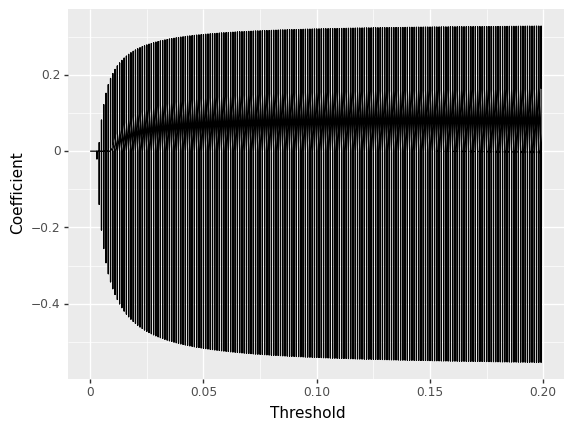

<ggplot: (327463090)>

In [31]:
(p9.ggplot(arrests_lasso_plt_melt, p9.aes(x = 'Threshold', y = 'Coefficient')) +
  p9.geom_line())

26. That does not look right! The line is connecting every single value. To fix this problem and to make it more visually appealing, we can also change the color according to the variable `Variable`. Add the line to the `aes()` statement. 

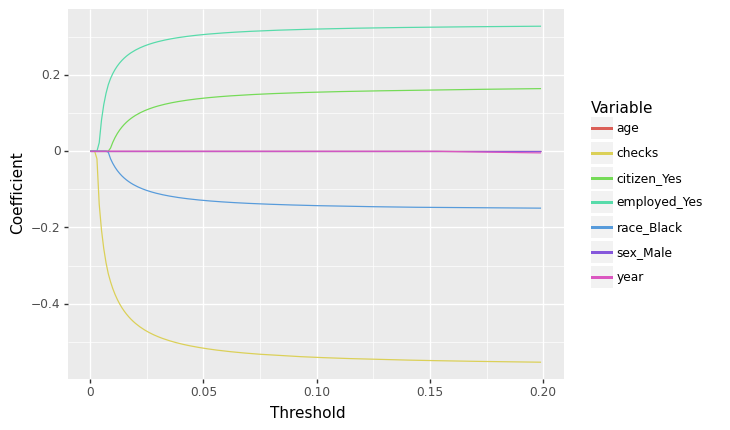

<ggplot: (327499093)>

In [32]:
(p9.ggplot(arrests_lasso_plt_melt, p9.aes(x = 'Threshold', y = 'Coefficient', 
                                          color = 'Variable')) +
  p9.geom_line())

27. The colors are helpful, but it is more helpful to have labels directly on the graph. This is a bit more complicated. We can use the `geom_text()` geom, but it will label every point--run the code below to confirm. 

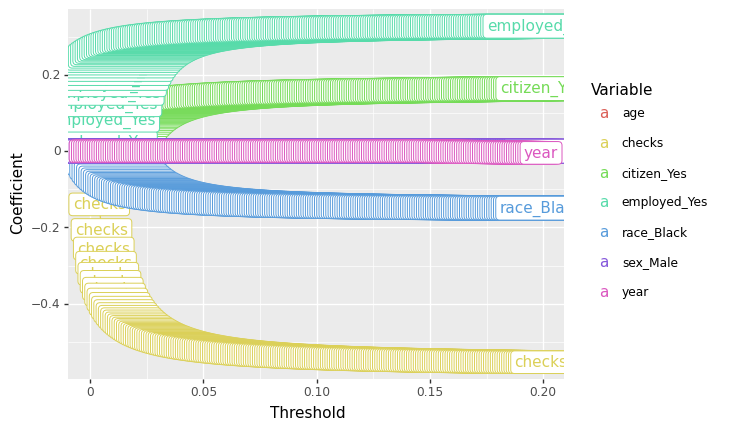

<ggplot: (327540685)>

In [33]:
(p9.ggplot(arrests_lasso_plt_melt, p9.aes(x = 'Threshold', y = 'Coefficient', 
                                          color = 'Variable')) +
  p9.geom_line() +
  p9.geom_label(mapping = p9.aes(label = 'Variable')))

28. I found that if you only want a few values, it was the most straightforward to create a new dataframe with only those values. Note that in the previous line of code you need an `x` and `y` coordinate--I picked the largest value of the threshold possible for `x` and the the largest coefficient value for each of the variables. You can do this easily with filtering--see the code below. 

In [34]:
max_T = arrests_lasso_plt_melt['Threshold'].loc[arrests_lasso_plt_melt.shape[0]-1]

plt_label = arrests_lasso_plt_melt[(arrests_lasso_plt_melt['Threshold'] == max_T)]

29. Now, we can adapt the `geom_text()` code. Note that there is a new argument, `inherit.aes = False`. This is telling `plotnine` that we no longer want the aesthetics from the first line! Once we do this, we also have to resupply the `data` and aesthetics.

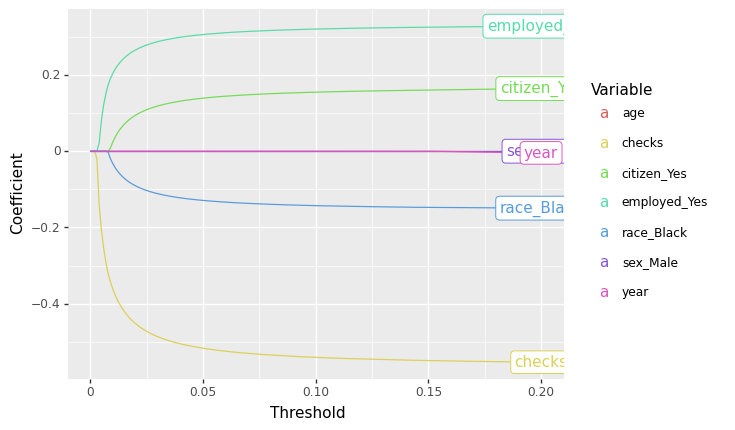

<ggplot: (327357736)>

In [35]:
(p9.ggplot(arrests_lasso_plt_melt, p9.aes(x = 'Threshold', y = 'Coefficient', 
                                          color = 'Variable')) +
  p9.geom_line() +
  p9.geom_label(inherit_aes = False, data = plt_label, 
                mapping = p9.aes(label = 'Variable', x = 0.2, 
                                 y = 'Coefficient', color = 'Variable')))

30. This is very close to what we want, but for the sake of readability, let's take the legend out--we don't need it since the labels are right on the graph. You can also adjust the axes a bit so the full labels don't get cut off. Run the code below--perfect!

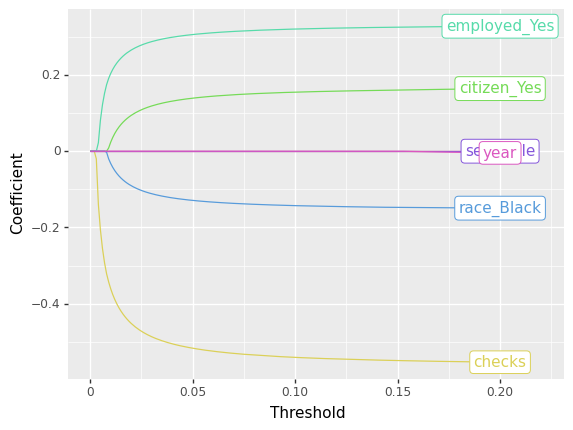

<ggplot: (327350074)>

In [37]:
(p9.ggplot(arrests_lasso_plt_melt, p9.aes(x = 'Threshold', y = 'Coefficient', 
                                          color = 'Variable')) +
  p9.geom_line() +
  p9.scale_x_continuous(limits = [0, 0.22]) +
  p9.theme(legend_position = "none") +
  p9.geom_label(inherit_aes = False, data = plt_label, 
                mapping = p9.aes(label = 'Variable', x = 0.2, 
                                 y = 'Coefficient', color = 'Variable')))

# Threshold Selection

31. Last, let's look at the AUC of the test set to pick our actual parameter. Print out some of the values, and identify the max AUC possible. Is it good or bad?

In [38]:
max(auc_list)

0.5206681166694551

\textcolor{blue}{This is a pretty bad AUC--it is not much bigger than 0.5! Maybe this is just not a great classifier.}

32. Locate the threshold that gives you the highest classifier. What terms are included in the model? 

In [ ]:
Cs[np.argmax(auc_list)]

\textcolor{blue}{The threshold is 0.02901. The model has four coefficients:} `employed`\textcolor{blue}{,} `citizen`\textcolor{blue}{,} `race`\textcolor{blue}{, and} `checks`\textcolor{blue}{.}